In [53]:
import math
import os
import sys
import numpy as np
import pandas as pd
SIGMA = 0.0035
SIGMA_SQR = SIGMA * SIGMA
class BFAnalyzer:
    def __init__(self):
        self.__frequency = [float(0)]*256
    def compute(self, text):
        for i in range(256):
            self.__frequency[i]=text.count(chr(i))
        return self
    def normalize(self):
        try:
            norm = max(self.__frequency)
            self.__frequency =  list(map(lambda x: x / norm, self.__frequency))
        except:
            pass
        return self
    def compand(self):
        B = 1.5
        self.__frequency =  list(map(lambda x: x ** ( 1 / B), self.__frequency))
        return self
    def frequency(self):
        return np.array(self.__frequency)
    def __str__(self):
        return ",".join(map(str, self.__frequency))
class BFFileprint:
    def __init__(self,signatures):
        self.__fileprint=[float(0)]*256
        self.__signatures=signatures
    def computeFileprint(self):
        tot=len(self.__signatures)
        for i in range(256):
            self.__fileprint[i]=(sum([x[i] for x in self.__signatures])/tot)
        return self
    def fileprint(self):
        return self.__fileprint
class ByteFrequencyCorrelator:
    def __init__(self,filePrint):
        self.filePrint = filePrint
    def correlate(self, signature):
        self.cmpSignature = signature
        self.correlation = [None] * 256
        for i in range(256):
            diff = self.cmpSignature[i] - self.baseSignature[i]
            exp = ( -1 * diff * diff ) / ( 2 * SIGMA_SQR )
            self.correlation[i] = math.exp(exp)
        return self.correlation
class BFCrossCorrelator:
    def __init__(self, baseSignature):
        self.baseSignature = baseSignature
    def correlate(self):
        self.correlation = Matrix = [[0 for x in range(256)] for x in range(256)]
        for i in range(256):
            for j in range(i):
                freqDiff = ( self.baseSignature[i] - self.baseSignature[j] )
                exp = ( -1 * freqDiff * freqDiff ) / ( 2 * SIGMA_SQR )
                self.correlation[i][j] = freqDiff
                self.correlation[j][i] = math.exp(exp)
        return self.correlation

In [46]:
worksample='/home/surya/blueOptima/worksample_data/'
data={}
for folder in os.listdir(worksample):
    temp=[]
    for file in os.listdir(worksample+folder):
        with open(worksample+folder+'/'+file) as textfile:
            try:
                text=textfile.read()
                analyzer=BFAnalyzer()
                signature=analyzer.compute(text).compand().normalize().frequency()
                temp.append(signature)
            except:
                pass
    data[folder]=temp
#signatures generated for every file and stored in data dictionary where keys are file type and values are signatures
#Compute FilePrint for each filetype from generated signatures
filePrints={}
for key,value in data.items():
    generator=BFFileprint(value)
    filePrints[key]=generator.compute().fileprint()
    

In [34]:
for folder in os.listdir('/home/surya/blueOptima/worksample_data')[1:2]:
    temp=[]
    for file in os.listdir('/home/surya/blueOptima/worksample_data/'+folder)[:4]:
        with open('/home/surya/blueOptima/worksample_data/'+folder+'/'+file) as textfile:
            text=textfile.read()
            analyzer=BFAnalyzer()
            signature=analyzer.compute(text).compand().normalize().frequency()
            print(signature)
            temp.append(signature) 
            

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.38491377 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.81173484 0.         0.35212929 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.85533067 0.28137368
 0.06062012 0.         0.06062012 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.35212929 0.22182755 0.35212929 0.         0.         0.24248048
 0.         0.15275313 0.         0.06062012 0.09622844 0.15275313
 0.         0.28137368 0.         0.         0.         0.335155
 0.06062012 0.09622844 0.28137368 0.09622844 0.24248048 0.35212929
 0.12609493 0.         0.         0.         0.         0.
 0.         0.         0.335155   0.         0.         0.
 0.         0.4466

In [54]:
filePrints={}
for key,value in data.items():
    generator=BFFileprint(value)
    filePrints[key]=generator.computeFileprint().fileprint()

In [25]:
from matplotlib import pyplot as plt

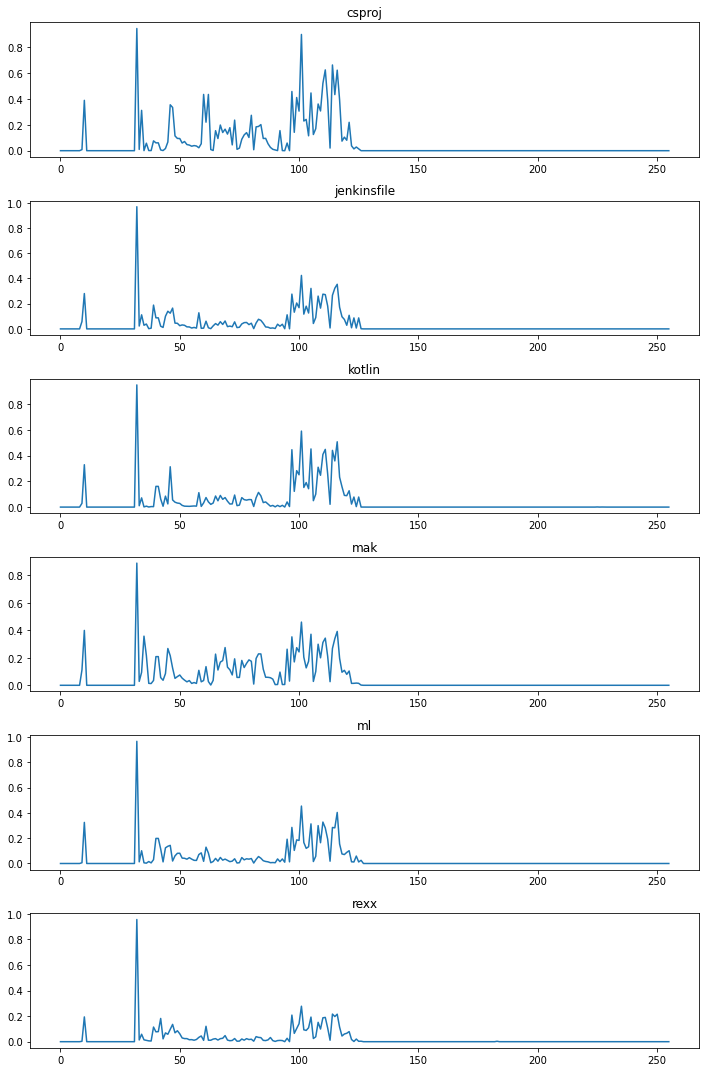

In [81]:
x=[i for i in range(256)]
#plt.figure(figsize=(10,60))
fig, axs = plt.subplots(6, 1,figsize=(10,15))
axs[0].plot(x,filePrints['csproj'] )
axs[0].set_title("csproj")
axs[1].plot(x,filePrints['jenkinsfile'])
axs[1].set_title("jenkinsfile")
axs[2].plot(x,filePrints['kt'])
axs[2].set_title("kotlin")
axs[3].plot(x,filePrints['mak'])
axs[3].set_title("mak")
axs[4].plot(x, filePrints['ml'])
axs[4].set_title("ml")
axs[5].plot(x,filePrints['rexx'])
axs[5].set_title('rexx')
fig.tight_layout()

In [50]:
for key,value in data.items():
    print(key+'   '+str(len(value)))

mak   96
csproj   232
rexx   242
jenkinsfile   249
ml   262
kt   998


In [106]:
X=[]
Y=[]
numy=[]
i=1
for key,value in data.items():
    y=[key]*len(value)
    X+=value
    numy+=[i]*len(value)
    i+=1

In [87]:
len(X)==len(Y)

True

In [88]:
XT=pd.DataFrame(X,columns=[i for i in range(256)])

In [89]:
XT.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(XT)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])

In [95]:
principalDf['target']=Y

In [94]:
data.keys()

dict_keys(['mak', 'csproj', 'rexx', 'jenkinsfile', 'ml', 'kt'])

In [98]:
import seaborn as sns

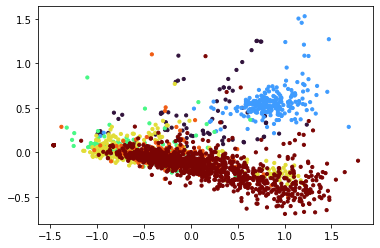

In [113]:
plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'], c=numy, s=10, cmap='turbo')
plt.show()

In [114]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(XT)
pDf3 = pd.DataFrame(data = principalComponents,columns = ['pc1', 'pc2','pc3'])

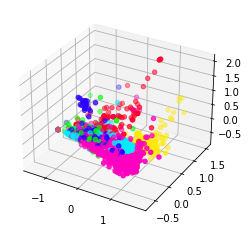

In [125]:
ax = plt.axes(projection='3d')


# Data for three-dimensional scattered points

ax.scatter3D(pDf3['pc1'],pDf3['pc2'],pDf3['pc3'], c=numy, cmap='gist_rainbow');